<a href="https://colab.research.google.com/github/Nuwanthapasindu/paddy-disease-prediction-ai-model/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/ML_Learning/paddy-disease-prediction-ai-model/archive.zip"

Archive:  /content/drive/MyDrive/ML_Learning/paddy-disease-prediction-ai-model/archive.zip
replace paddy-disease-classification/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: paddy-disease-classification/sample_submission.csv  
replace paddy-disease-classification/test_images/bacterial_leaf_blight/100023.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace paddy-disease-classification/test_images/bacterial_leaf_blight/100049.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
data_set_path = "/content/paddy-disease-classification"
data_set_train_path = os.path.join(data_set_path, "train_images")
print(data_set_train_path)
data_set_test_path = os.path.join(data_set_path, "test_images")

/content/paddy-disease-classification/train_images


In [5]:
IMAGE_SIZE = 480
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_set_train_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 19131 files belonging to 10 classes.


# Data Visualization

In [7]:
class_names = train_dataset.class_names
class_names

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [18]:
def calculate_class_counts(dataset,folder_path):
  class_names = dataset.class_names
  class_counts = {}
  for class_name in class_names:
    class_dir = os.path.join(folder_path, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))
  return class_counts


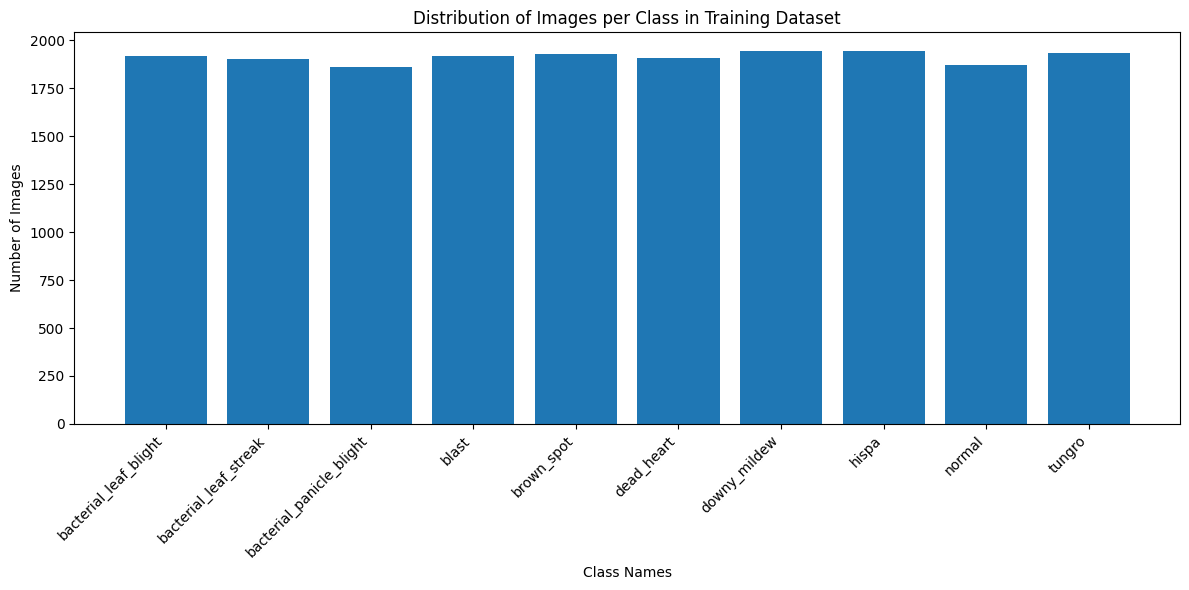

In [19]:
train_dataset_class_counts = calculate_class_counts(train_dataset,data_set_train_path)
plt.figure(figsize=(12, 6))
plt.bar(train_dataset_class_counts.keys(), train_dataset_class_counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class in Training Dataset")
plt.tight_layout()
plt.show()

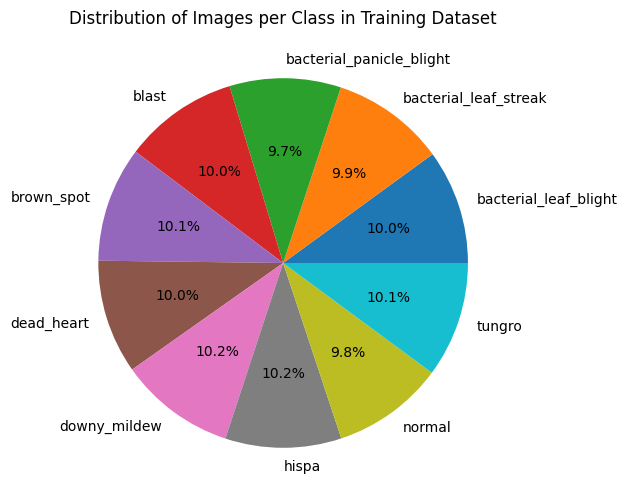

In [20]:
plt.figure(figsize=(12, 6))
plt.pie(train_dataset_class_counts.values(), labels=train_dataset_class_counts.keys(), autopct='%1.1f%%')
plt.title("Distribution of Images per Class in Training Dataset")
plt.show()

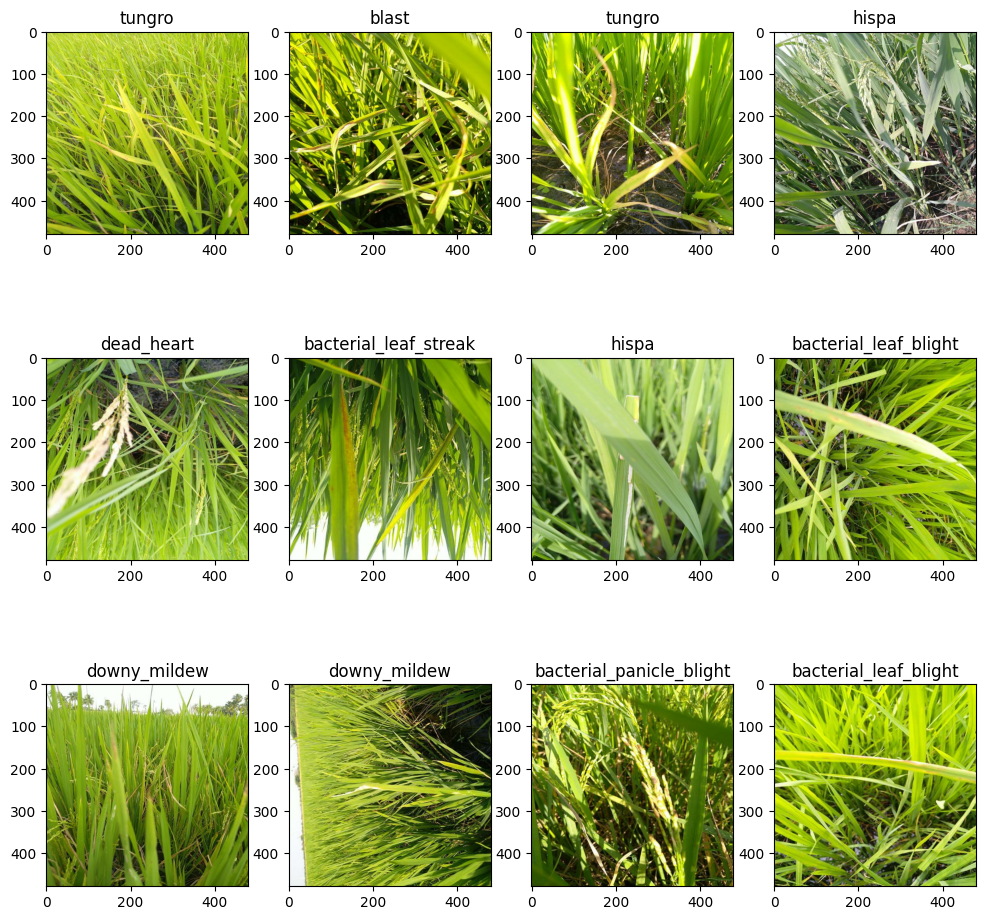

In [21]:
plt.figure(figsize=(12, 12))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

# Testing dataset

In [22]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_set_test_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 10407 files belonging to 10 classes.


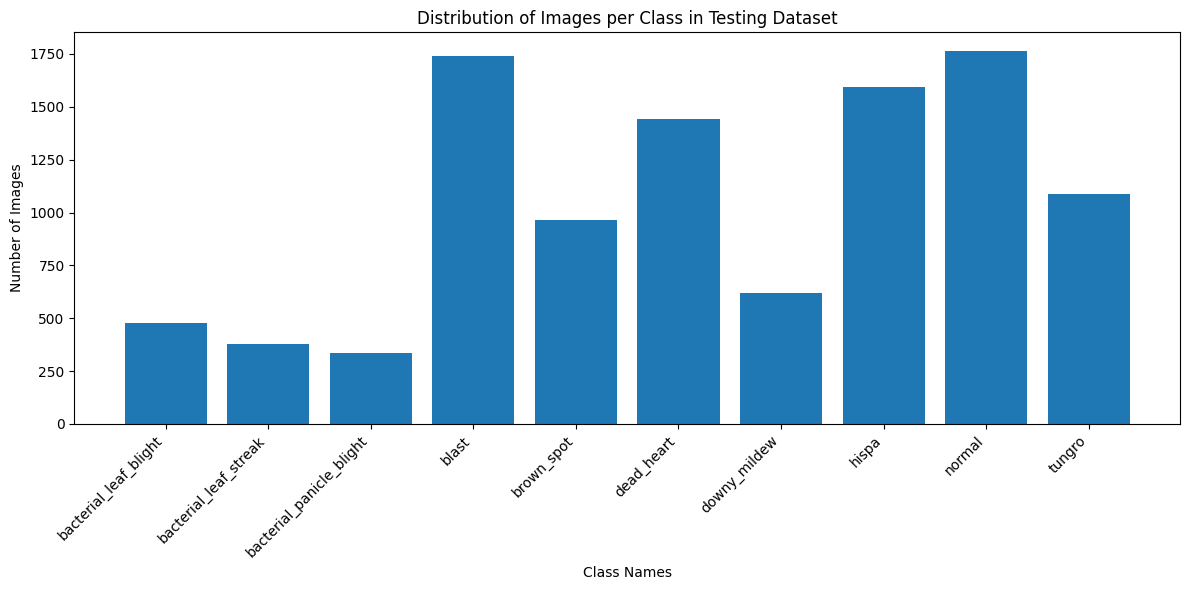

In [23]:
test_dataset_class_counts = calculate_class_counts(test_dataset,data_set_test_path)
plt.figure(figsize=(12, 6))
plt.bar(test_dataset_class_counts.keys(), test_dataset_class_counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class in Testing Dataset")
plt.tight_layout()
plt.show()

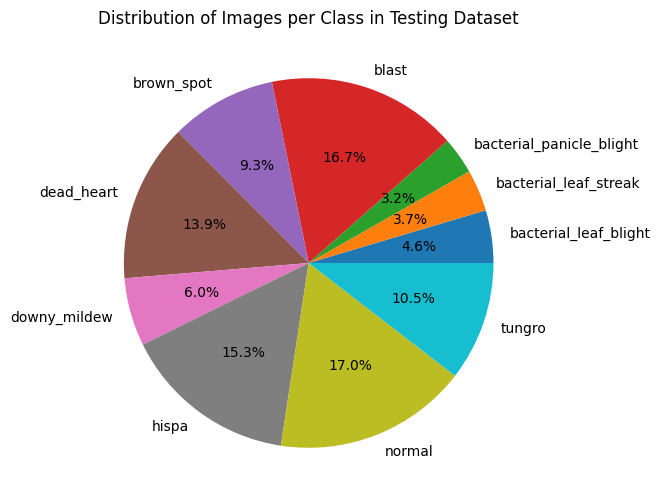

In [24]:
plt.figure(figsize=(12, 6))
plt.pie(test_dataset_class_counts.values(), labels=test_dataset_class_counts.keys(), autopct='%1.1f%%')
plt.title("Distribution of Images per Class in Testing Dataset")
plt.show()

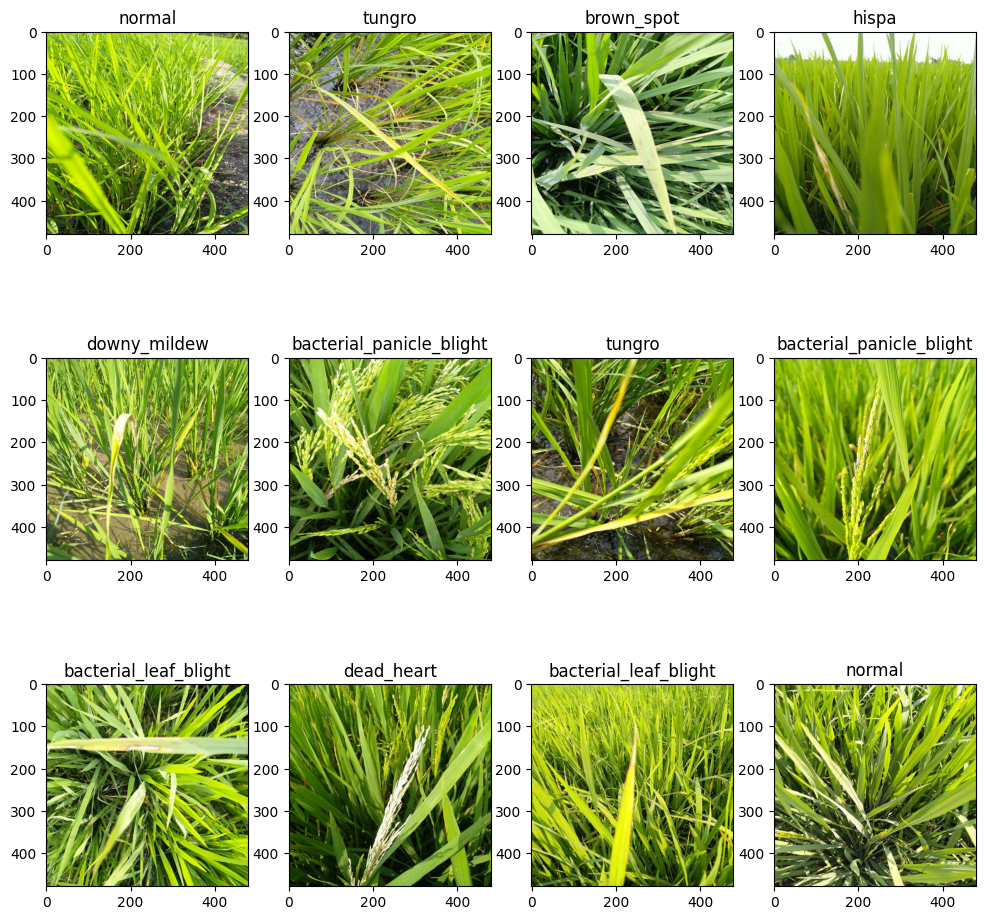

In [25]:
plt.figure(figsize=(12, 12))
for image_batch, label_batch in test_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

# Train vs Test Data

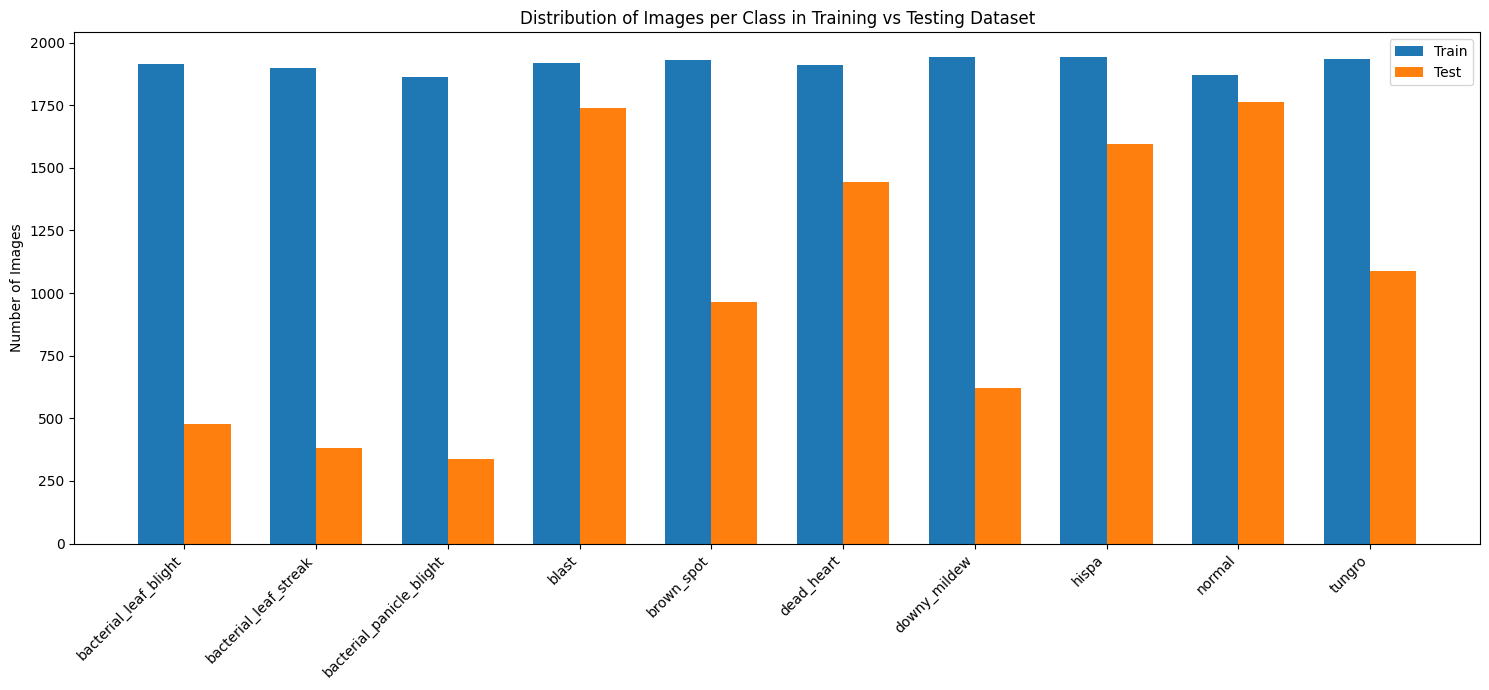

In [26]:
class_names = train_dataset.class_names

train_counts = list(train_dataset_class_counts.values())
test_counts = list(test_dataset_class_counts.values())

x = np.arange(len(class_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, test_counts, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images per Class in Training vs Testing Dataset')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()

In [31]:
total_train_images = sum(train_dataset_class_counts.values())
total_test_images = sum(test_dataset_class_counts.values())

print(f"Total number of images in the training dataset: {total_train_images}")
print(f"Total number of images in the testing dataset: {total_test_images}")

Total number of images in the training dataset: 19131
Total number of images in the testing dataset: 10407


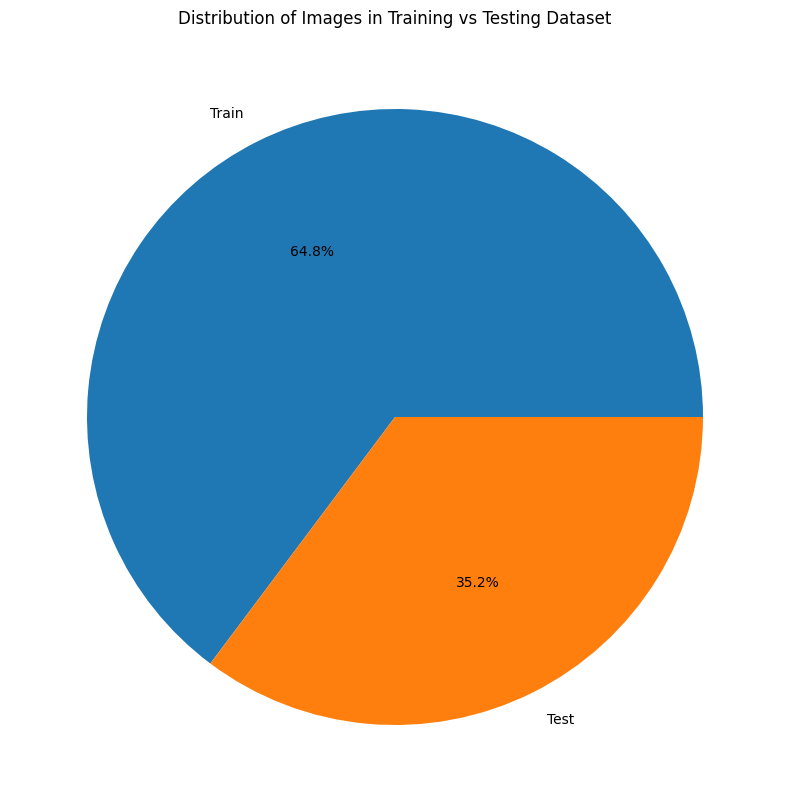

In [33]:
plt.figure(figsize=(10, 10))
plt.pie([total_train_images, total_test_images], labels=['Train', 'Test'], autopct='%1.1f%%')
plt.title("Distribution of Images in Training vs Testing Dataset")
plt.show()